In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data set
df = pd.read_csv('student.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Dataset has 1000 rows and 8 columns


##Data set information

##gender	--> [male, female]

##race_ethnicity --> [group A,group B, group C]

##parental_level_of_education --> [high school, some college, associate's degree, bachelor's degree, master's degree]

##lunch --> [standard, free/reduced]

##test_preparation_course --> [none, completed]

##math_score

##reading_score

##writing_score



Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [5]:
#checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values is present in dataset

In [6]:
#checking duplicates
df.duplicated().sum()

0

No dupliacte values is present in dataset

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [9]:
#checking unique values in each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#stats data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above description of numerical data, all means are very close to each other - between 66 and 69.16;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
#adding new columns total_score and average
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [19]:
#creating categorical and numerical features
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [22]:
print("total {} numerical features : {}".format(len(numerical_feature), numerical_feature))
print("total {} categorical features: {} ".format(len(Categorical_feature), Categorical_feature))

total 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
total 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [27]:
math_full_score = df[df['math_score'] == 100]['average'].count()
reading_full_score  = df[df['reading_score'] == 100]['average'].count()
writing_full_score = df[df['writing_score'] == 100]['average'].count()

print("full marks in math_full_score:", math_full_score)
print("full marks in reading_full_score:",  reading_full_score)
print("full marks in writing_full_score:" , writing_full_score)

full marks in math_full_score: 7
full marks in reading_full_score: 17
full marks in writing_full_score: 14


In [28]:
math_failed_marks = df[df['math_score'] <= 35]['average'].count()
reading_failed_marks = df[df['reading_score'] <= 35]['average'].count()
writing_failed_marks = df[df['writing_score'] <= 35]['average'].count()


print("total number of failed students in math : ",math_failed_marks )
print("total number of failed students in reading: ", reading_failed_marks)
print("total number of failed students in writing: ", writing_failed_marks)

total number of failed students in math :  27
total number of failed students in reading:  15
total number of failed students in writing:  18


In [32]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Out of math, reading, writing : math were least performing

Data Visualization

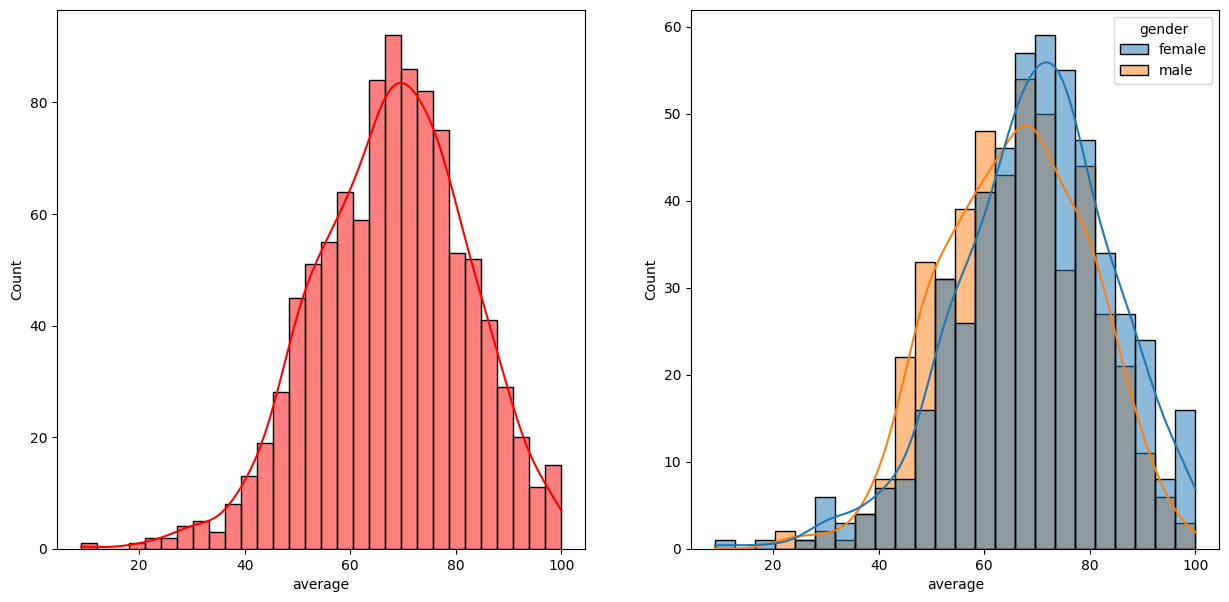

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = df['average'], bins=30, kde=True, color= 'r')
plt.subplot(122)
sns.histplot(data = df, x= df['average'], kde=True, hue= df['gender'])
plt.show()

Females were performing well over males

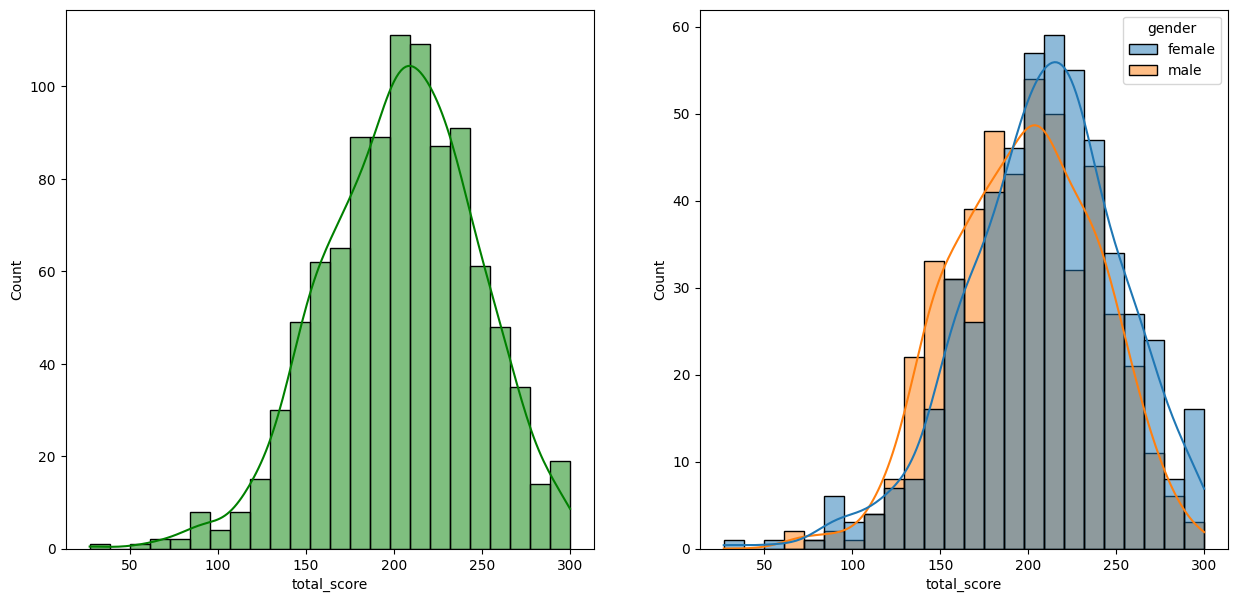

In [31]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = df['total_score'], kde=True, color= 'g')
plt.subplot(122)
sns.histplot(data = df, x=df['total_score'], kde=True, hue= df['gender'])
plt.show()

High scores are female's over male's